In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [11]:
experiment_directory = Path.cwd()

In [12]:
# Load the output data
outputs_df = pd.read_csv(experiment_directory / "outputs.csv")

In [14]:
outputs_df.head()

,Unnamed: 0,simulation_id,wind_speed,fuel_load_category,control_fuel_load,treatment_fuel_load,control_fuel_height,treatment_fuel_height,control_fuel_moisture_content,treatment_fuel_moisture_content,control_sav,treatment_sav,circle_radius,fuel_model,resolution,ros
0,0,0,0.5000,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0
1,1,1,0.5455,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0
2,2,2,0.5909,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0
3,3,3,0.6364,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0
4,4,4,0.6818,high,0.31,0.155,0.6096,0.1524,0.15,0.15,6561,6561,1.8288,pfm,coarse,0.0


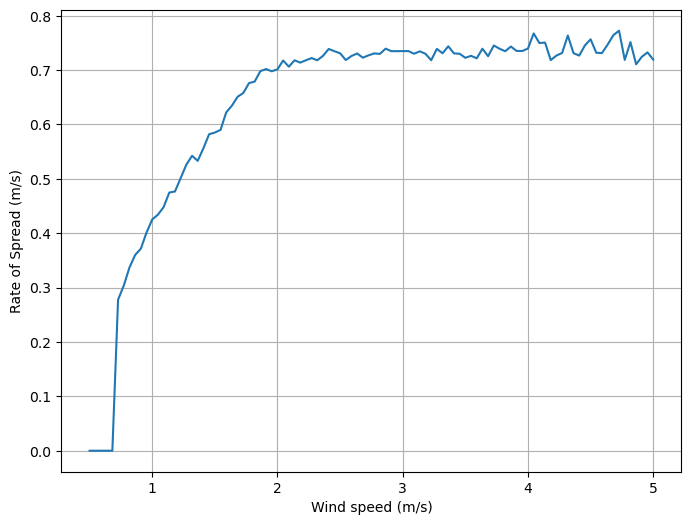

In [21]:
# Plot the ros as a function of wind speed
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(outputs_df["wind_speed"], outputs_df["ros"])
ax.set_xlabel("Wind speed (m/s)")
ax.set_ylabel("Rate of Spread (m/s)")
ax.grid(True)
plt.show()